** Problem Description ** 

Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.5004 - acc: 0.8244
Epoch 2/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3782 - acc: 0.8630
Epoch 3/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3402 - acc: 0.8755
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3135 - acc: 0.8841
Epoch 5/5
10000/10000 [==============================] - 0s 39us/sample - loss: 0.3600 - acc: 0.8695
Test accuracy:  0.8695
############Prediction for some of the test images##########


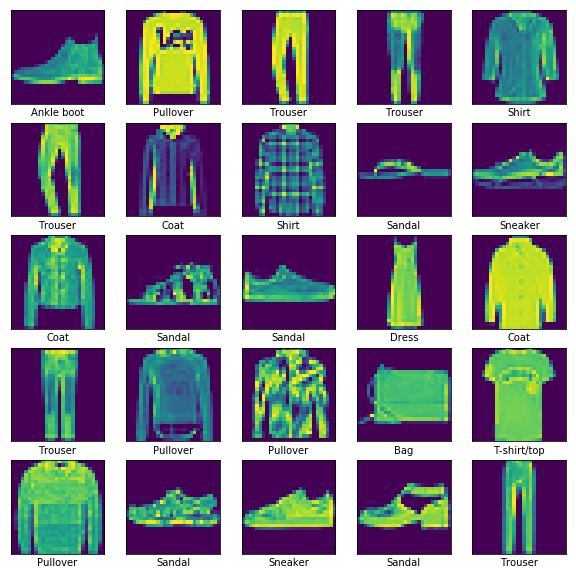

In [28]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#print(tf.__version__)

# Load Fashion MNIST dataset 
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


# Images are 28 * 28 numpy array each entry representing a pixel [0,...,255]
# Labels are one of the following 10 categories

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Exploring data 
# Uncomment lines with '##' to execute them
##print(train_images.shape)
##print(len(train_labels))
##print(train_labels.max())
##print(train_labels.min())
##print(test_images.shape)
##print(len(train_labels))
##plt.imshow(train_images[0])


# Normalizing the input to values between [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# The data is ready now! Build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128,activation = tf.nn.relu),
    keras.layers.Dense(10,activation = tf.nn.softmax)
]) 

# Compile the model 
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# Train the model
model.fit(train_images,train_labels,epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy: ", test_acc)

# Make predictions
predictions = model.predict(test_images)

print("############Prediction for some of the test images##########")
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(class_names[np.argmax(predictions[i])])
plt.show()